경로 설정하기

In [ ]:
import pandas as pd
import re
import os
import warnings
warnings.filterwarnings('ignore')
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
cd /content/drive/MyDrive/구미시 뉴스기사 분류

/content/drive/MyDrive/구미시 뉴스기사 분류


In [ ]:
# 크롤링한 뉴스기사 파일 업로드 후 불러오기
df = pd.read_excel('NewsResult_20180101-20221120.xlsx')

뉴스기사 데이터 전처리

In [ ]:
# 뉴스기사 전처리
p = re.compile('[^ ㄱ-ㅣ가-힣+]')

def remove_special_characters(sentence):
    sentence = p.sub(' ',sentence)
    sentence = ' '.join(sentence.split())
    return sentence

df['전처리기사'] = df['본문'].map(remove_special_characters)
df['전처리기사'] = df['전처리기사'].map(lambda x: x.replace('대구', '대구시'))
df['전처리기사'] = df['전처리기사'].map(lambda x: x.replace('대구시시', '대구시'))

전체 워드클라우드

In [ ]:
#@title
%%bash
apt-get update
apt-get install g++ openjdk-8-jdk python-dev python3-dev
pip3 install JPype1
pip3 install konlpy

Hit:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease
Hit:2 http://archive.ubuntu.com/ubuntu bionic InRelease
Get:3 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:5 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:6 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Hit:9 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:10 http://ppa.launchpad.net/deadsnakes/ppa/ubuntu bionic InRelease
Get:11 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [83.3 kB]
Hit:12 http://ppa.launchpad.net/graphics-drivers/ppa/ubuntu bionic InRelease
Fetched 261 kB in 3s (88.4 kB/s)
Reading package li

In [ ]:
#@title
%env JAVA_HOME "/usr/lib/jvm/java-8-openjdk-amd64"

env: JAVA_HOME="/usr/lib/jvm/java-8-openjdk-amd64"


In [ ]:
import sys
from wordcloud import WordCloud
from konlpy.tag import Twitter
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from PIL import *
import nltk
import numpy as np
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
korean_stopwords_path = "/content/drive/MyDrive/구미시 뉴스기사 분류/data/korean_stopwords.txt"

with open(korean_stopwords_path, encoding = 'utf-8') as f:
    stopwords = f.readlines()
stopwords = [x.strip() for x in stopwords]

In [ ]:
def remove_stopwords(sentence):
    word_tokens = word_tokenize(sentence)
    word_list = []

    for word in word_tokens:
        if word not in stopwords:
            if word[:2] != '구미' and word[:2] != '경북':
                word_list.append(word)
        sentence = ' '.join(word_list)
    return sentence

df['불용어제거기사'] = df['전처리기사'].map(remove_stopwords)

In [ ]:
df['전처리기사']

0        이영 중소벤처기업부 장관이 지난 일 구미를 방문했다 이 장관의 이번 방문은 구미시의...
1        이헌승 국회 국방위원회 위원장이 일 방산 투자 활기를 띠고 있는 경북 구미를 방문해...
2        구미시 금오공대 한국산업단지공단은 일 금오공대에서 경북 구미 강소연구개발특구 육성사...
3        아시아경제 영남취재본부 김용우 기자 구미시는 일 금오공과대학교에서 김장호 구미시장 ...
4        순천향대 구미병원은 일 구미 호텔금오산에서 박준용 구미시의사회장과 협력 병 의원 관...
                               ...                        
19318    존경하는 만 구미시민 여러분 년 무술년 새해가 밝았습니다 우리에게 가장 친숙한 동물...
19319    인사 대구시 중구청 급 전보 도시재생과장 김명주 관광자원과장 김순희 일자리경제과장 ...
19320    구미대 유아교육과 학생들은 지난달 일 구미 김천 지역 어린이를 위한 행사 이쁘동이제...
19321    김진수 기자 올해 입주 물량이 년대 이후 최대 규모인 만 가구에 이 를 것으로 예상...
19322    년 국제신문 신춘문예 개 부문 당선자와 당선작이 다음과 같이 선정됐습니다 당선작과 ...
Name: 전처리기사, Length: 19323, dtype: object

In [ ]:
df['불용어제거기사']

0        이영 중소벤처기업부 장관이 방문했다 장관의 방문은 반도체특구 지정과 지역중소기업의 ...
1        이헌승 국회 국방위원회 위원장이 방산 투자 활기를 띠고 있는 방문해 방산업체 유관 ...
2        금오공대 한국산업단지공단은 금오공대에서 강소연구개발특구 육성사업 중간보고 간담회를 ...
3        아시아경제 영남취재본부 김용우 기자 금오공과대학교에서 김장호 곽호상 금오공대 총장 ...
4        순천향대 호텔금오산에서 박준용 협력 병 의원 관계자 명이 참석한 가운데 개원의 연수...
                               ...                        
19318    존경하는 만 무술년 새해가 밝았습니다 우리에게 가장 친숙한 동물이자 액운을 물리치는...
19319    인사 대구시 중구청 급 전보 도시재생과장 김명주 관광자원과장 김순희 일자리경제과장 ...
19320    유아교육과 학생들은 지난달 김천 지역 어린이를 위한 행사 이쁘동이제 통해 모금한 수...
19321    김진수 기자 올해 입주 물량이 년대 이후 최대 규모인 만 가구에 것으로 예상되면서 ...
19322    국제신문 신춘문예 개 부문 당선자와 당선작이 다음과 선정됐습니다 당선작과 당선소감 ...
Name: 불용어제거기사, Length: 19323, dtype: object

In [ ]:
news = str(df['불용어제거기사'].values)
twitter = Twitter()

sentences_tag = []
sentences_tag = twitter.pos(news)

noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun', 'Adjective'] and len(str(word)) > 1:
        noun_adj_list.append(word)

counts = Counter(noun_adj_list)
tags = counts.most_common(100)
cand_mask = np.array(Image.open('circle.png'))

wc = WordCloud(font_path = '/content/drive/MyDrive/구미시 뉴스기사 분류/data/NanumPen.ttf', background_color = 'white', mask = cand_mask, width = 500, height = 500)
cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file('gumi_news.png')

뉴스 기사 긍/부정 분류

In [ ]:
#@title
!pip install transformers
!pip install tensorflow_addons

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import os
import pandas as pd
import numpy as np
import re
from tqdm import tqdm
import urllib.request
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow_addons as tfa
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from transformers import BertTokenizer, TFBertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, \
                            roc_auc_score, confusion_matrix, classification_report, \
                            matthews_corrcoef, cohen_kappa_score, log_loss

**KLUE** BERT 사용

In [ ]:
MODEL_NAME = "klue/bert-base"
model = TFBertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=3, from_pt=True)
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

Some weights of the PyTorch model were not used when initializing the TF 2.0 model TFBertForSequenceClassification: ['bert.embeddings.position_ids']
- This IS expected if you are initializing TFBertForSequenceClassification from a PyTorch model trained on another task or with another architecture (e.g. initializing a TFBertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing TFBertForSequenceClassification from a PyTorch model that you expect to be exactly identical (e.g. initializing a TFBertForSequenceClassification model from a BertForSequenceClassification model).
Some weights or buffers of the TF 2.0 model TFBertForSequenceClassification were not initialized from the PyTorch model and are newly initialized: ['classifier.weight', 'classifier.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


모델 학습을 위한 데이터 전처리

0    0.592708
1    0.282163
2    0.125129
Name: labels, dtype: float64

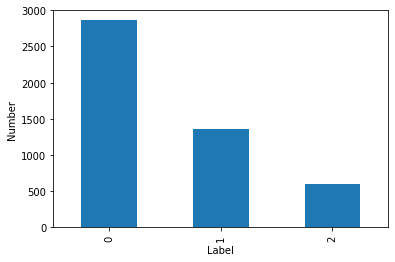

In [ ]:
DATASET_URL = "https://raw.githubusercontent.com/ukairia777/finance_sentiment_corpus/main/finance_data.csv"
DATASET_NAME = "finance_data.csv"

urllib.request.urlretrieve(DATASET_URL,
                           filename = DATASET_NAME
                           )

dataset = pd.read_csv(DATASET_NAME)

del dataset['sentence']

dataset['labels'] = dataset['labels'].replace(['neutral', 'positive', 'negative'],[0, 1, 2])

dataset[dataset['kor_sentence'].duplicated()]

DATASET_PREP_FILE = './data/dataset_prep.csv'
# 중복 데이터 제거
dataset.drop_duplicates(subset = ['kor_sentence'], inplace = True)
dataset.to_csv(DATASET_PREP_FILE) # 구글 드라이브 내 data 폴더에 저장

LABEL_NUM_FILE = './figure/label_number.png'
dataset['labels'].value_counts().plot(kind = 'bar')
plt.xlabel("Label")
plt.ylabel("Number")
plt.savefig(LABEL_NUM_FILE) # 구글 드라이브 내 figure 폴더에 저장

dataset['labels'].value_counts(normalize = True)

입 출력 데이터 분리

In [ ]:
# 입출력 데이터 분리
X_data = dataset['kor_sentence']
y_data = dataset['labels']

TEST_SIZE = 0.2 # Train: Test = 8 :2 분리
RANDOM_STATE = 42
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data,
                                                    test_size = TEST_SIZE,
                                                    random_state = RANDOM_STATE,
                                                    stratify = y_data)

BERT 입력용 포맷으로 변경

In [ ]:
# 입력 데이터(문장) 길이 제한
MAX_SEQ_LEN = 64

def convert_data(X_data, y_data):
    # BERT 입력으로 들어가는 token, mask, segment, target 저장용 리스트
    tokens, masks, segments, targets = [], [], [], []

    for X, y in tqdm(zip(X_data, y_data)):
        # token: 입력 문장 토큰화
        token = tokenizer.encode(X, truncation = True, padding = 'max_length', max_length = MAX_SEQ_LEN)

        # Mask: 토큰화한 문장 내 패딩이 아닌 경우 1, 패딩인 경우 0으로 초기화
        num_zeros = token.count(0)
        mask = [1] * (MAX_SEQ_LEN - num_zeros) + [0] * num_zeros

        # segment: 문장 전후관계 구분: 오직 한 문장이므로 모두 0으로 초기화
        segment = [0]*MAX_SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)
        targets.append(y)

    # numpy array로 저장
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)
    targets = np.array(targets)

    return [tokens, masks, segments], targets

데이터를 BERT Input 타입에 맞게 변환

In [ ]:
# train 데이터를 Bert의 Input 타입에 맞게 변환
train_x, train_y = convert_data(X_train, y_train)

# test 데이터를 Bert의 Input 타입에 맞게 변환
test_x, test_y = convert_data(X_test, y_test)

# token, mask, segment 입력 정의
token_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_word_ids')
mask_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_masks')
segment_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_segment')
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

# token, mask, segment 입력 정의
token_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_word_ids')
mask_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_masks')
segment_inputs = tf.keras.layers.Input((MAX_SEQ_LEN,), dtype = tf.int32, name = 'input_segment')
bert_outputs = model([token_inputs, mask_inputs, segment_inputs])

bert_output = bert_outputs[0]

3861it [00:03, 1198.41it/s]
966it [00:01, 796.29it/s]


하이퍼파라미터 설정

In [ ]:
DROPOUT_RATE = 0.5
NUM_CLASS = 3
dropout = tf.keras.layers.Dropout(DROPOUT_RATE)(bert_output)
# Multi-class classification 문제이므로 activation function은 softmax로 설정
sentiment_layer = tf.keras.layers.Dense(NUM_CLASS, activation='softmax', kernel_initializer = tf.keras.initializers.TruncatedNormal(stddev=0.02))(dropout)
sentiment_model = tf.keras.Model([token_inputs, mask_inputs, segment_inputs], sentiment_layer)

# 옵티마이저 Rectified Adam 하이퍼파리미터 조정
OPTIMIZER_NAME = 'RAdam'
LEARNING_RATE = 5e-5
TOTAL_STEPS = 10000
MIN_LR = 1e-5
WARMUP_PROPORTION = 0.1
EPSILON = 1e-8
CLIPNORM = 1.0
optimizer = tfa.optimizers.RectifiedAdam(learning_rate = LEARNING_RATE,
                                          total_steps = TOTAL_STEPS,
                                          warmup_proportion = WARMUP_PROPORTION,
                                          min_lr = MIN_LR,
                                          epsilon = EPSILON,
                                          clipnorm = CLIPNORM)

# 감정분류 모델 컴파일
sentiment_model.compile(optimizer = optimizer,
                        loss = tf.keras.losses.SparseCategoricalCrossentropy(),
                        metrics = ['accuracy'])

MIN_DELTA = 1e-3
PATIENCE = 5

early_stopping = EarlyStopping(
    monitor = "val_accuracy",
    min_delta = MIN_DELTA,
    patience = PATIENCE)

# 최고 성능의 모델 파일을 저장할 이름과 경로 설정
BEST_MODEL_NAME = './model/best_model.h5'
model_checkpoint = ModelCheckpoint(
    filepath = BEST_MODEL_NAME,
    monitor = "val_loss",
    mode = "min",
    save_best_only = True, # 성능 향상 시에만 모델 저장
    verbose = 1
)

callbacks = [early_stopping, model_checkpoint]

device_name = tf.test.gpu_device_name()
if device_name == '/device:GPU:0':
  print("GPU 작동 중")
  mirrored_strategy = tf.distribute.MirroredStrategy()
else:
  print("GPU 미작동 중")

GPU 작동 중


뉴스기사 감성분석 모델 학습

In [ ]:
EPOCHS = 100
BATCH_SZIE = 32

sentiment_model.fit(train_x, train_y,
                    epochs = EPOCHS,
                    shuffle = True,
                    batch_size = BATCH_SZIE,
                    validation_data = (test_x, test_y),
                    callbacks = callbacks
                    )

Epoch 1/100
121/121 [==============================] - ETA: 0s - loss: 1.0929 - accuracy: 0.4880
Epoch 1: val_loss improved from inf to 1.08793, saving model to ./model/best_model.h5
121/121 [==============================] - 103s 575ms/step - loss: 1.0929 - accuracy: 0.4880 - val_loss: 1.0879 - val_accuracy: 0.5901
Epoch 2/100
121/121 [==============================] - ETA: 0s - loss: 1.0764 - accuracy: 0.5403
Epoch 2: val_loss improved from 1.08793 to 1.05796, saving model to ./model/best_model.h5
121/121 [==============================] - 70s 576ms/step - loss: 1.0764 - accuracy: 0.5403 - val_loss: 1.0580 - val_accuracy: 0.5921
Epoch 3/100
121/121 [==============================] - ETA: 0s - loss: 1.0405 - accuracy: 0.5965
Epoch 3: val_loss improved from 1.05796 to 1.00573, saving model to ./model/best_model.h5
121/121 [==============================] - 71s 586ms/step - loss: 1.0405 - accuracy: 0.5965 - val_loss: 1.0057 - val_accuracy: 0.7567
Epoch 4/100
121/121 [===================

모델 호출 밑 결과

In [ ]:
# 최고 성능의 모델 불러오기
sentiment_model_best = tf.keras.models.load_model(BEST_MODEL_NAME,
                                                  custom_objects={'TFBertForSequenceClassification': TFBertForSequenceClassification})

# 모델이 예측한 라벨 도출
predicted_value = sentiment_model_best.predict(test_x)
predicted_label = np.argmax(predicted_value, axis = 1)

# Classification Report 저장
CL_REPORT_FILE = "./metric/cl_report.csv"

cl_report = classification_report(test_y, predicted_label, output_dict = True)
cl_report_df = pd.DataFrame(cl_report).transpose()
cl_report_df = cl_report_df.round(3)
cl_report_df.to_csv(CL_REPORT_FILE)
print(cl_report_df)

31/31 [==============================] - 8s 136ms/step
              precision  recall  f1-score  support
0                 0.866   0.893     0.880  572.000
1                 0.761   0.758     0.760  273.000
2                 0.856   0.736     0.791  121.000
accuracy          0.835   0.835     0.835    0.835
macro avg         0.828   0.796     0.810  966.000
weighted avg      0.835   0.835     0.835  966.000


학습된 모델을 활용한 뉴스기사 긍/부정 분류

In [ ]:
def convert_news(X_data):
    # BERT 입력으로 들어가는 token, mask, segment, target 저장용 리스트
    tokens, masks, segments = [], [], []

    for X in tqdm(X_data):
        # token: 입력 문장 토큰화
        token = tokenizer.encode(X, truncation = True, padding = 'max_length', max_length = MAX_SEQ_LEN)

        # Mask: 토큰화한 문장 내 패딩이 아닌 경우 1, 패딩인 경우 0으로 초기화
        num_zeros = token.count(0)
        mask = [1] * (MAX_SEQ_LEN - num_zeros) + [0] * num_zeros

        # segment: 문장 전후관계 구분: 오직 한 문장이므로 모두 0으로 초기화
        segment = [0]*MAX_SEQ_LEN

        tokens.append(token)
        masks.append(mask)
        segments.append(segment)

    # numpy array로 저장
    tokens = np.array(tokens)
    masks = np.array(masks)
    segments = np.array(segments)

    return [tokens, masks, segments]

In [ ]:
news_test = convert_news(df['전처리기사'].values)
news_predict = sentiment_model_best.predict(news_test)
news_label = np.argmax(news_predict, axis = 1)

100%|██████████| 19323/19323 [00:16<00:00, 1165.64it/s]


604/604 [==============================] - 86s 142ms/step


분류된 기사의 인덱스 추출

In [ ]:
neutral_news_index = []
pos_news_index = []
neg_news_index = []
index_value = 0

for news in news_label:
    if news == 1:
        pos_news_index.append(index_value)
        index_value += 1
    elif news == 2:
        neg_news_index.append(index_value)
        index_value += 1
    else:
        neutral_news_index.append(index_value)
        index_value += 1

긍/부정 기사 분류

In [ ]:
neutral_news = []
pos_news = []
neg_news = []

for label in neutral_news_index:
    neutral_news.append(df['전처리기사'][label])

for label in pos_news_index:
    pos_news.append(df['전처리기사'][label])

for label in neg_news_index:
    neg_news.append(df['전처리기사'][label])

In [ ]:
neutral_df = pd.DataFrame(neutral_news)
pos_df = pd.DataFrame(pos_news)
neg_df = pd.DataFrame(neg_news)

neutral_df.to_csv('/content/drive/MyDrive/구미시 뉴스기사 분류/data/neutral_news.csv', sep = ',', encoding = 'utf-8-sig')
pos_df.to_csv('/content/drive/MyDrive/구미시 뉴스기사 분류/data/positive_news.csv', sep = ',', encoding = 'utf-8-sig')
neg_df.to_csv('/content/drive/MyDrive/구미시 뉴스기사 분류/data/negative_news.csv', sep = ',', encoding = 'utf-8-sig')

긍/부정 기사 워드 클라우드

In [ ]:
neutral_df = pd.read_csv('/content/drive/MyDrive/구미시 뉴스기사 분류/data/neutral_news.csv')
pos_df = pd.read_csv('/content/drive/MyDrive/구미시 뉴스기사 분류/data/positive_news.csv')
neg_df = pd.read_csv('/content/drive/MyDrive/구미시 뉴스기사 분류/data/negative_news.csv')

neutral_df['불용어제거기사'] = neutral_df['0'].map(remove_stopwords)
pos_df['불용어제거기사'] = pos_df['0'].map(remove_stopwords)
neg_df['불용어제거기사'] = neg_df['0'].map(remove_stopwords)

In [ ]:
news = str(pos_df['불용어제거기사'].values)
twitter = Twitter()

sentences_tag = []
sentences_tag = twitter.pos(news)

noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun', 'Adjective'] and len(str(word)) > 1:
        noun_adj_list.append(word)

counts = Counter(noun_adj_list)
tags = counts.most_common(100)
cand_mask = np.array(Image.open('circle.png'))

wc = WordCloud(font_path = '/content/drive/MyDrive/구미시 뉴스기사 분류/data/NanumPen.ttf', background_color = 'white', mask = cand_mask, width = 500, height = 500)
cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file('gumi_positive_news.png')

In [ ]:
news = str(neg_df['불용어제거기사'].values)
twitter = Twitter()

sentences_tag = []
sentences_tag = twitter.pos(news)

noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun', 'Adjective'] and len(str(word)) > 1:
        noun_adj_list.append(word)

counts = Counter(noun_adj_list)
tags = counts.most_common(100)
cand_mask = np.array(Image.open('circle.png'))

wc = WordCloud(font_path = '/content/drive/MyDrive/구미시 뉴스기사 분류/data/NanumPen.ttf', background_color = 'white', mask = cand_mask, width = 500, height = 500)
cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file('gumi_negative_news.png')

In [ ]:
news = str(neutral_df['불용어제거기사'].values)
twitter = Twitter()

sentences_tag = []
sentences_tag = twitter.pos(news)

noun_adj_list = []

for word, tag in sentences_tag:
    if tag in ['Noun', 'Adjective'] and len(str(word)) > 1:
        noun_adj_list.append(word)

counts = Counter(noun_adj_list)
tags = counts.most_common(100)
cand_mask = np.array(Image.open('circle.png'))

wc = WordCloud(font_path = '/content/drive/MyDrive/구미시 뉴스기사 분류/data/NanumPen.ttf', background_color = 'white', mask = cand_mask, width = 500, height = 500)
cloud = wc.generate_from_frequencies(dict(tags))

cloud.to_file('gumi_neutral_news.png')